# Выявить закономерности определяющие успешность игры

Для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Из открытых источников доступны исторические данные до 2016 года  о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель исследования:**

Cделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования:** 

Данные о продажах игр, оценки пользователей и экспертов, жанры и платформы получим из файлов `games.csv`. О качестве данных ничего не известно. Поэтому перед работой с архивом понадобится обзор данных.

Таким образом, исследование пройдёт в пять этапов:
 1. Изучение данных из файла.
 2. Подготовка данных.
 3. Анализ данных.
 4. Составление портрета пользователя каждого региона.
 5. Проверка гипотез.
 6. Общий вывод.

*Примечание:
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».*


##  Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.duplicated().sum()

0

Таблица games (информация об играх):
* `name` — название игры
* `platform` — платформа
* `year_of_release` — год выпуска
* `genre` — жанр игры
* `na_sales` — продажи в Северной Америке (миллионы проданных копий)
* `eu_sales` — продажи в Европе (миллионы проданных копий)
* `jp_sales` — продажи в Японии (миллионы проданных копий)
* `other_sales` — продажи в других странах (миллионы проданных копий)
* `critic_score` — оценка критиков (максимум 100)
* `user_score` — оценка пользователей (максимум 10)
* `rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Выводы**

Предварительно можно утверждать, что, данных достаточно для проверки гипотез, но в столбцах `Critic_Score`, `User_Score` и `Rating` встречаются пропуски в данных. Так же необходимо заменить названия столбцов (привести к нижнему регистру).


Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Подготовим данные

### Заменим названия столбцов (приведём к нижнему регистру):

In [6]:
df.columns = df.columns.str.lower()

In [7]:
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Преобразуем данные в нужные типы: 

Мы заменим тип данных в столбцах `user_score`, `critic_score` и `year_of_release`. Поскольку `user_score` нужен будет для вычислений. `critic_score` и `year_of_release` имеют целое значение в данных. Сделаем это ниже, поскольку для начала нужно заполнить пропуски в данных.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### Обработаем пропуски при необходимости:



#### Объясним, почему заполнили пропуски определённым образом или почему не стали это делать:

In [10]:
pd.DataFrame(df.isna().mean().round(4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
critic_score,51.320000
rating,40.480000
user_score,40.090000
year_of_release,1.610000
genre,0.010000
name,0.010000
other_sales,0.000000
jp_sales,0.000000
eu_sales,0.000000
na_sales,0.000000


In [11]:
df.dropna(subset=['year_of_release', 'genre', 'name'], inplace=True)
df.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Мы удалили пропуски в `year_of_release`, `genre`, `name` поскольку их очень мало. При этом заменить их невозможно без дополнительных данных.

Заменять рейтинг на средний будет неправильным решением. Поэтому введем заглушки - "999" на численный рейтинг, а категориальный рейтинг в `rating` заменим на "unrated".

In [12]:
df['critic_score'].fillna(999, inplace=True)
df['rating'].fillna('unrated', inplace=True)
df['user_score'].fillna(999, inplace=True)

In [13]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score'].astype('int')

#### Опишем причины, которые могли привести к пропускам:


Наиболее вероятно, что пропуски в `critic_score`, `rating`, `user_score` были вызваны маленьким количеством отзывов или отсутсвием данных.

#### Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишите, как его обработать:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.5+ MB


In [15]:
df['user_score'].unique()

array(['8', 999, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Поскольку рейтинг не установлен, так же ввдём заглушку - "999".

In [16]:
df['user_score'] = df['user_score'].replace('tbd', '999')

In [17]:
df['user_score'] = df['user_score'].astype('float')

In [18]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,999,999.0,unrated
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,999,999.0,unrated
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,999,999.0,unrated
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,999,999.0,unrated
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,999,999.0,unrated
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,999,999.0,unrated


### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [19]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

In [20]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,999,999.0,unrated,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,999,999.0,unrated,30.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,999,999.0,unrated,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,999,999.0,unrated,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,999,999.0,unrated,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,999,999.0,unrated,0.01


## Проведём исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

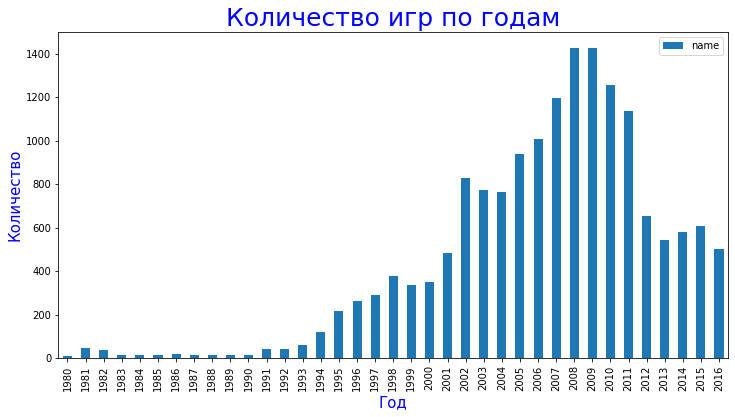

In [21]:
game_yaers = df.pivot_table(index='year_of_release',
                                  values='name', 
                                  aggfunc='count').plot(y='name',
                                                        kind='bar',
                                                        figsize=(12, 6))

plt.title('Количество игр по годам', color='blue', fontsize=25)
plt.xlabel('Год', color='blue', fontsize=15)
plt.ylabel('Количество', color='blue', fontsize=15)

plt.show()

Важны данные от 1994 года.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

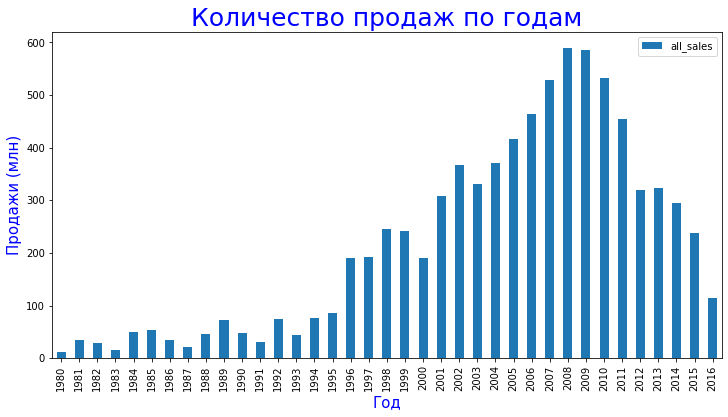

In [22]:
platform_sales = df.pivot_table(index='year_of_release',
                                            values='all_sales', 
                                            aggfunc='sum').plot(y='all_sales',
                                                                  kind='bar',
                                                                  figsize=(12, 6))

plt.title('Количество продаж по годам', color='blue', fontsize=25)
plt.xlabel('Год', fontsize=15, color='blue')
plt.ylabel('Продажи (млн)', fontsize=15, color='blue')
plt.show()

In [23]:
top_platform_sales = df.pivot_table(index='platform',
                                          values='all_sales', 
                                          aggfunc='sum').sort_values(by='all_sales')[::-1]

top_platform_sales.head(10).style.background_gradient('coolwarm')

,all_sales
platform,
PS2,1043.090000
X360,876.360000
Wii,813.470000
PS3,796.750000
DS,743.740000
PS,686.890000
GBA,305.270000
PS4,265.790000
PSP,248.770000


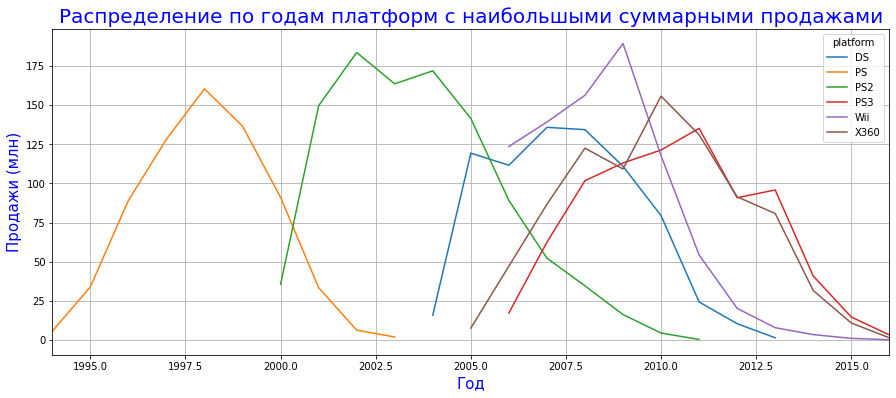

In [24]:
df_top_platform = df.query('platform==["PS2","X360","PS3","Wii","DS","PS"]')\
.pivot_table(index='year_of_release', columns ='platform',values='all_sales',aggfunc='sum')


df_top_platform.plot(figsize=(15,6),
                     xlim=(1994,2016),
                     grid=True)
plt.title('Распределение по годам платформ с наибольшыми суммарными продажами', color='blue', fontsize=20)
plt.xlabel('Год', fontsize=15, color='blue')
plt.ylabel('Продажи (млн)', fontsize=15, color='blue')
plt.show()

Из графика топовых платформ можно сделать вывод, что новые платформы появляются в среднем спустя 6 лет, а старые платформы уходят с рынка спустя 8-11 лет после выхода. При этом стоит отметить, что промежуток существования платформы на рынке растет с течением времени, не смотря на повышенную конкуренцию к 2006 году. Более того можно сделать выводы, что X360 и PS3 являются прямыми конкурентами, поскольку их выпуск и объем продаж имеет идентичность по общим признакам.

### Возьмём данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Возьмем за актуальный период данные за последние 2 года, чтобы не захватить уже отживишие тенды.

### Не учитываем в работе данные за предыдущие годы.

In [25]:
df = df.query('year_of_release > 2014')

### Выяснить какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

В выбранный актуальный период с 2015 по 2016 из нескольких платформ выберем популярные, которые остаются до сих пор имеют потенциал на рынке, чтобы данные по жарнам были максимально актуальны:

In [26]:
top_platform_sales_2015_2016 = df.pivot_table(index='platform',
                                          values='all_sales', 
                                          aggfunc='sum').sort_values(by='all_sales')[::-1]

top_platform_sales_2015_2016.head(15).style.background_gradient('coolwarm')

,all_sales
platform,
PS4,159.450000
XOne,78.580000
3DS,41.250000
WiiU,19.470000
PS3,17.930000
PC,12.820000
X360,12.260000
PSV,10.030000
Wii,1.220000


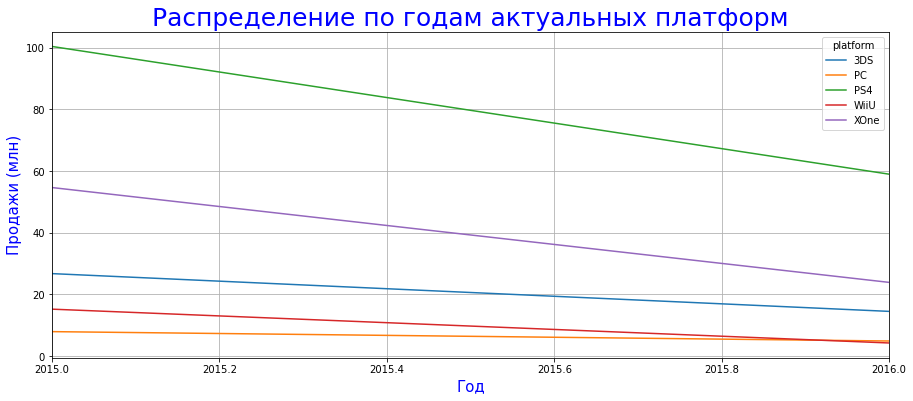

In [27]:
df_top_5_platform = df.query('platform==["PC","WiiU", "3DS", "XOne", "PS4"]')\
.pivot_table(index='year_of_release', columns ='platform', values='all_sales', aggfunc='sum')


df_top_5_platform.plot(figsize=(15,6),
                     xlim=(2015,2016),
                     grid=True)
plt.title('Распределение по годам актуальных платформ', color='blue', fontsize=25)
plt.xlabel('Год', fontsize=15, color='blue')
plt.ylabel('Продажи (млн)', fontsize=15, color='blue')
plt.show()

Мы отобрали топ 5 платформ, которые имеют потцениал. Исключили из списка топовые консоли, которые уже ушли с рынка или уйдут в ближайшие годы.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

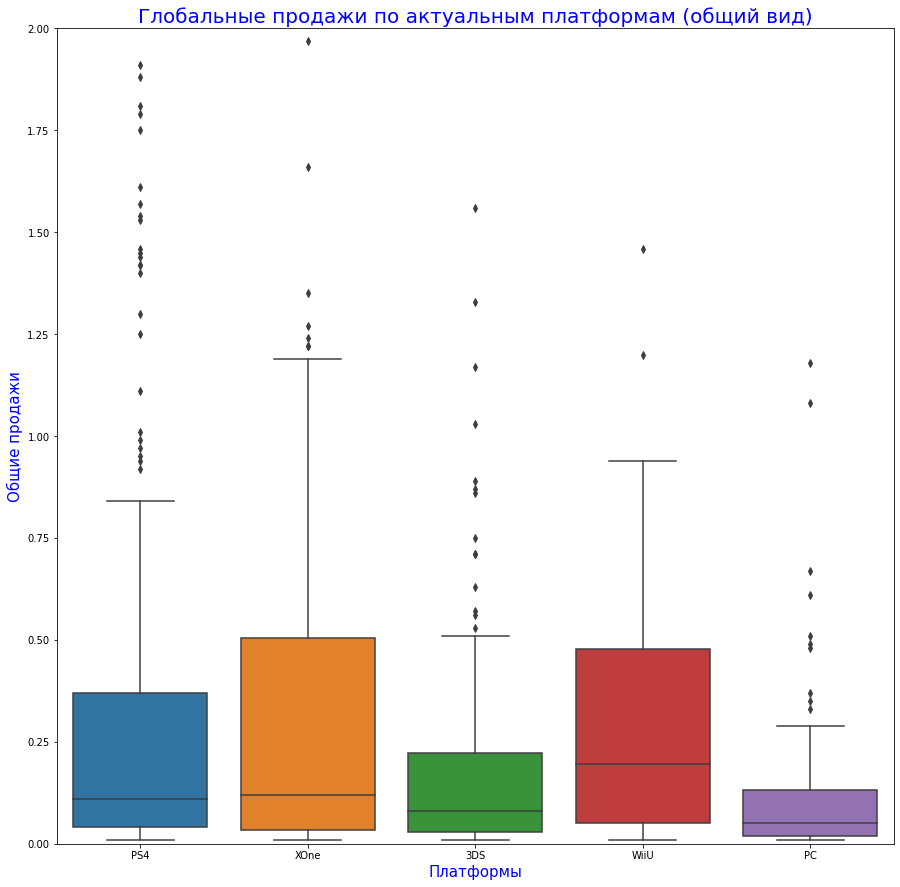

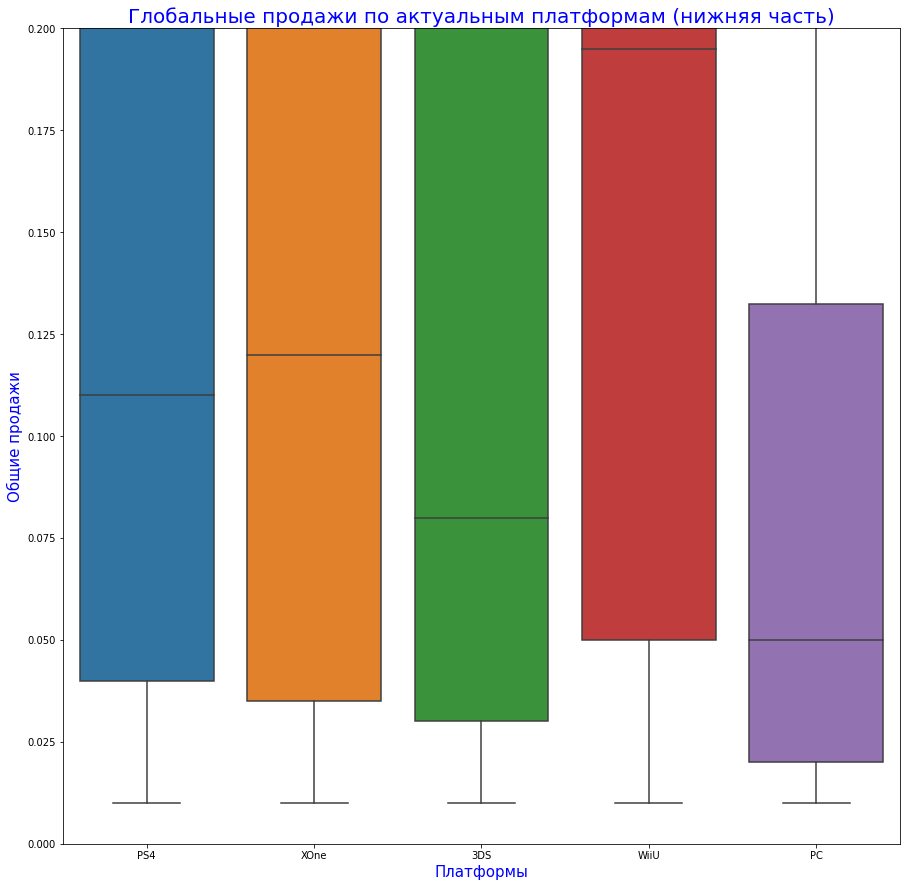

In [28]:
df_actual = df.query('platform==["PC","WiiU", "3DS", "XOne", "PS4"]')

plt.figure(figsize=(15, 15))
sns.boxplot(y = 'all_sales', x='platform', data = df_actual)

plt.title('Глобальные продажи по актуальным платформам (общий вид)', color='blue', fontsize=20)
plt.xlabel('Платформы', fontsize=15, color='blue')
plt.ylabel('Общие продажи', fontsize=15, color='blue')
plt.ylim(0, 2)
plt.show()



plt.figure(figsize=(15, 15))
sns.boxplot(y = 'all_sales', x='platform', data = df_actual)

plt.title('Глобальные продажи по актуальным платформам (нижняя часть)', color='blue', fontsize=20)
plt.xlabel('Платформы', fontsize=15, color='blue')
plt.ylabel('Общие продажи', fontsize=15, color='blue')
plt.ylim(0, 0.2)
plt.show()

Из полученных результатов можно выделить трех лидеров по суммарным продажам за одну игру - XOne, PS4 и WiiU. При этом самые высокие средние продажи у WiiU.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

              all_sales  critic_score  user_score
all_sales      1.000000      0.391462   -0.063215
critic_score   0.391462      1.000000    0.533330
user_score    -0.063215      0.533330    1.000000


array([[<AxesSubplot:xlabel='all_sales', ylabel='all_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='all_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='all_sales'>],
       [<AxesSubplot:xlabel='all_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='all_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

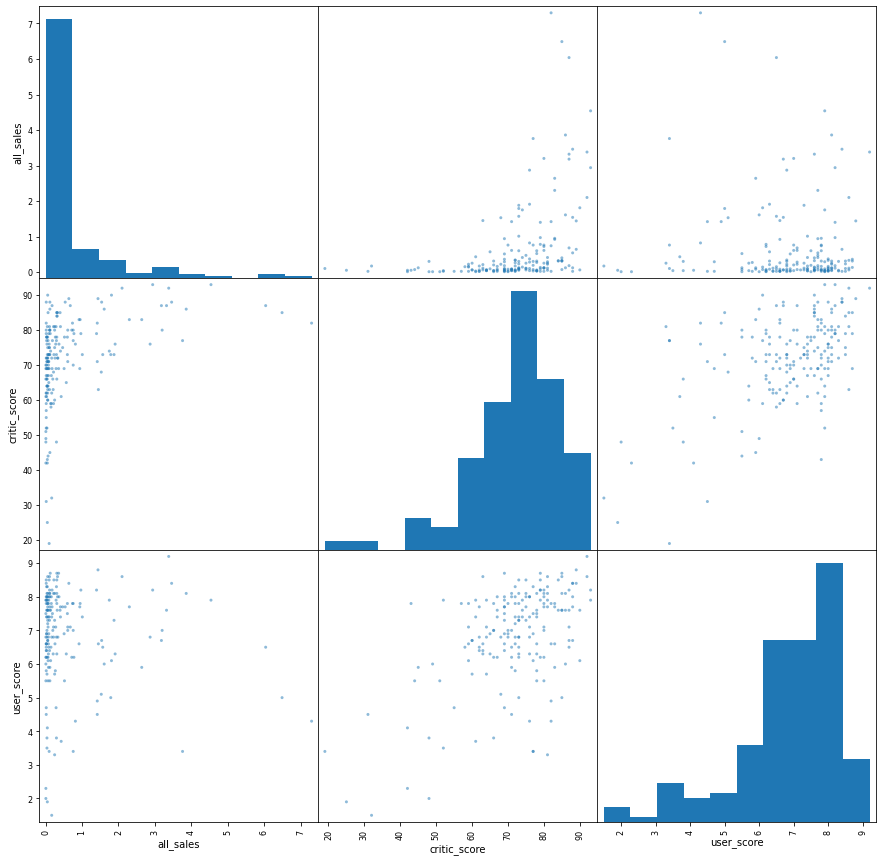

In [29]:
ps4_platform = df.query('platform == "PS4"')
ps4_platform = ps4_platform.query('0 < user_score < 999')
ps4_platform = ps4_platform.query('0 < critic_score < 999')


ps4_platform_multi = ps4_platform.pivot_table(index='name', 
                                        values=['user_score', 'critic_score', 'all_sales'])

print(ps4_platform_multi.corr())
pd.plotting.scatter_matrix(ps4_platform_multi, figsize=(15,15))

Чем выше рейтинг, тем больше продаж.

### Соотнесите выводы с продажами игр на других платформах.

              all_sales  critic_score  user_score
all_sales      1.000000      0.376480    0.141394
critic_score   0.376480      1.000000    0.482804
user_score     0.141394      0.482804    1.000000


array([[<AxesSubplot:xlabel='all_sales', ylabel='all_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='all_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='all_sales'>],
       [<AxesSubplot:xlabel='all_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='all_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

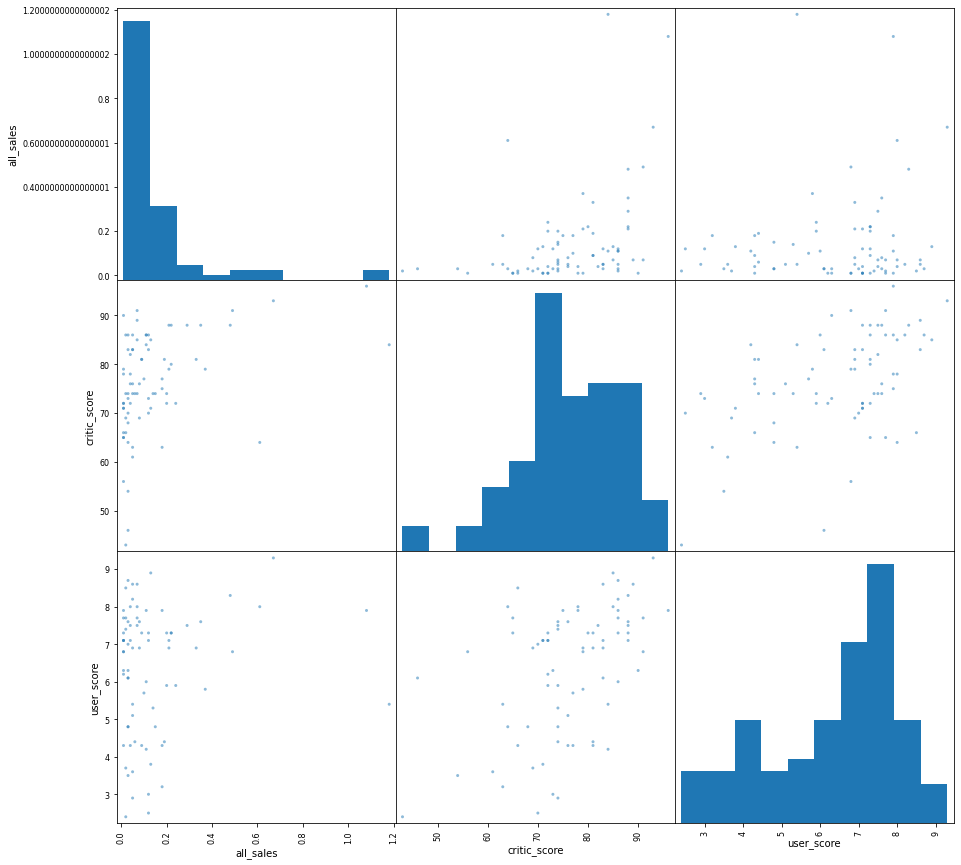

In [30]:
PC_platform = df.query('platform == "PC"')
PC_platform = PC_platform.query('0 < user_score < 999')
PC_platform = PC_platform.query('0 < critic_score < 999')

PC_platform_multi = PC_platform.pivot_table(index='name', 
                                        values=['user_score', 'critic_score', 'all_sales'])

print(PC_platform_multi.corr())
pd.plotting.scatter_matrix(PC_platform_multi, figsize=(15,15))

              all_sales  critic_score  user_score
all_sales      1.000000      0.323891    0.353769
critic_score   0.323891      1.000000    0.678858
user_score     0.353769      0.678858    1.000000


array([[<AxesSubplot:xlabel='all_sales', ylabel='all_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='all_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='all_sales'>],
       [<AxesSubplot:xlabel='all_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='all_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

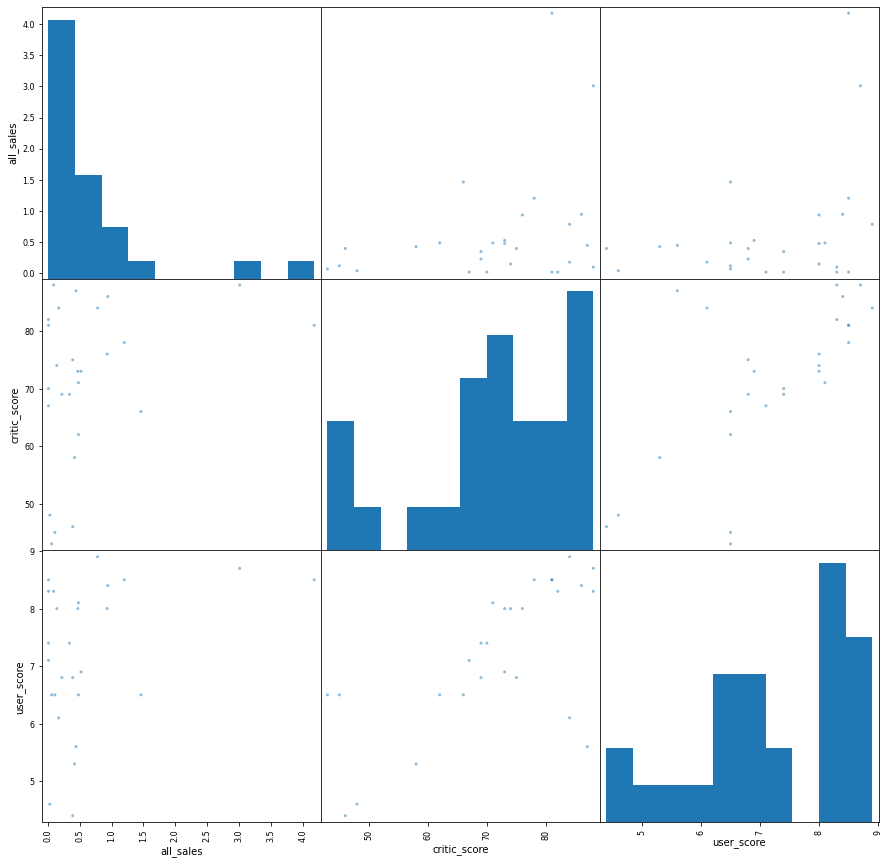

In [31]:
WiiU_platform = df.query('platform == "WiiU"')
WiiU_platform = WiiU_platform.query('0 < user_score < 999')
WiiU_platform = WiiU_platform.query('0 < critic_score < 999')

WiiU_platform_multi = WiiU_platform.pivot_table(index='name', 
                                        values=['user_score', 'critic_score', 'all_sales'])

print(WiiU_platform_multi.corr())
pd.plotting.scatter_matrix(WiiU_platform_multi, figsize=(15,15))

              all_sales  critic_score  user_score
all_sales      1.000000      0.171391    0.233947
critic_score   0.171391      1.000000    0.791853
user_score     0.233947      0.791853    1.000000


array([[<AxesSubplot:xlabel='all_sales', ylabel='all_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='all_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='all_sales'>],
       [<AxesSubplot:xlabel='all_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='all_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

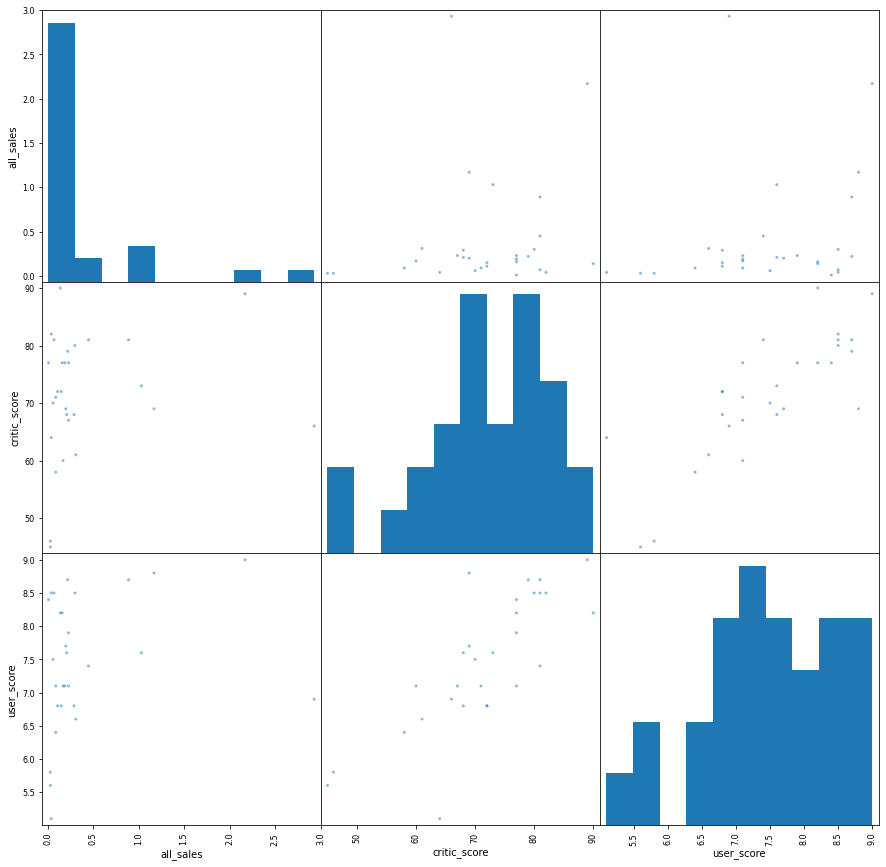

In [32]:
DS_platform = df.query('platform == "3DS"')
DS_platform = DS_platform.query('0 < user_score < 999')
DS_platform = DS_platform.query('0 < critic_score < 999')

DS_platform_multi = DS_platform.pivot_table(index='name', 
                                        values=['user_score', 'critic_score', 'all_sales'])

print(DS_platform_multi.corr())
pd.plotting.scatter_matrix(DS_platform_multi, figsize=(15,15))

              all_sales  critic_score  user_score
all_sales      1.000000      0.422137   -0.069382
critic_score   0.422137      1.000000    0.459443
user_score    -0.069382      0.459443    1.000000


array([[<AxesSubplot:xlabel='all_sales', ylabel='all_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='all_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='all_sales'>],
       [<AxesSubplot:xlabel='all_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='all_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

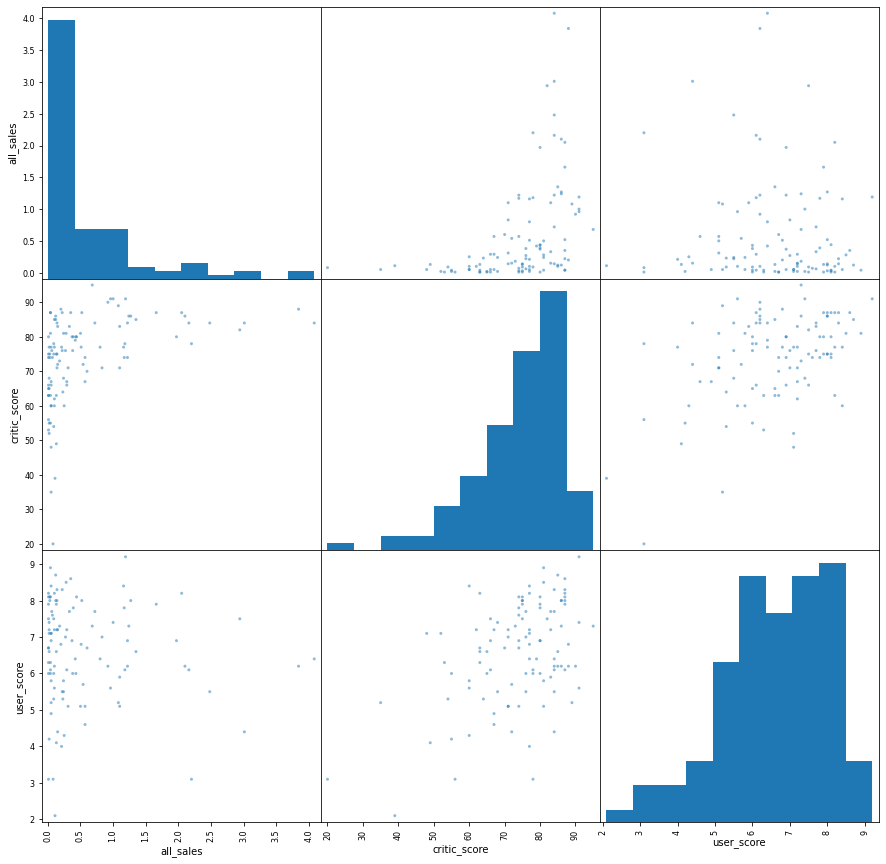

In [33]:
XOne_platform = df.query('platform == "XOne"')
XOne_platform = XOne_platform.query('0 < user_score < 999')
XOne_platform = XOne_platform.query('0 < critic_score < 999')

XOne_platform_multi = XOne_platform.pivot_table(index='name', 
                                        values=['user_score', 'critic_score', 'all_sales'])

print(XOne_platform_multi.corr())
pd.plotting.scatter_matrix(XOne_platform_multi, figsize=(15,15))

Ситуация на других платформах аналогичная. Оданко WiiU немного выделяется на фоне других, там есть хорошие продажи игр с низким рейтингом. Возможно это связано с интерфейсом или политикой внутреннего магазина, при которой, например, рейтинг игр не отображается внутри магазина

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

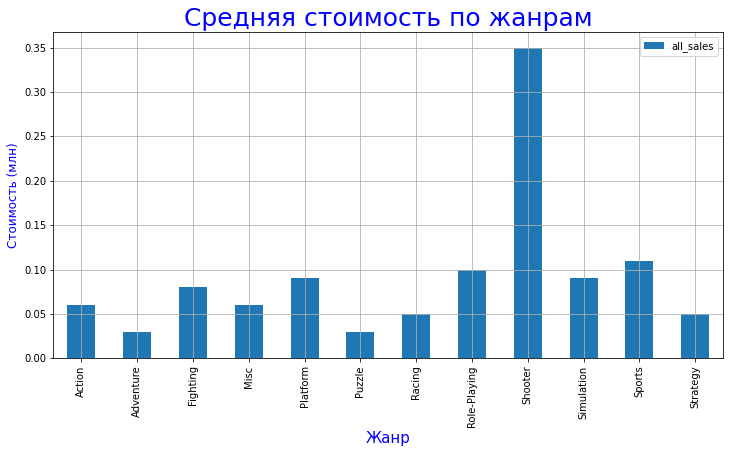

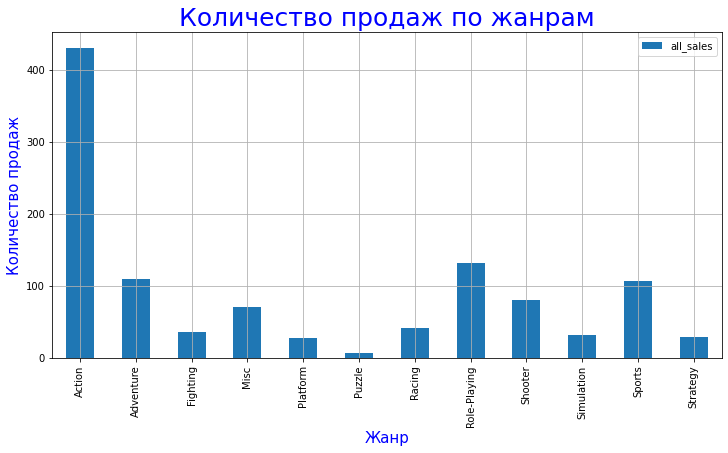

In [34]:
all_platform_genre = df.pivot_table(index='genre',
                                    values='all_sales', 
                                    aggfunc='median').plot(y='all_sales',
                                                        kind='bar',
                                                        grid=True,
                                                        figsize=(12, 6))


plt.title('Средняя стоимость по жанрам', color='blue', fontsize=25)
plt.xlabel('Жанр', fontsize=15, color='blue')
plt.ylabel('Стоимость (млн)', fontsize=12, color='blue')
plt.show()

all_platform_genre = df.pivot_table(index='genre',
                                    values='all_sales', 
                                    aggfunc='count').plot(y='all_sales',
                                                        kind='bar',
                                                        grid=True,
                                                        figsize=(12, 6))


plt.title('Количество продаж по жанрам', color='blue', fontsize=25)
plt.xlabel('Жанр', fontsize=15, color='blue')
plt.ylabel('Количество продаж', fontsize=15, color='blue')
plt.show()

Самые прибыльный жанр - Shooter, самый не прибыльный - Puzzle и Adventure. Самый популрный жарн - Action, самый не популярный - Puzzle.

## Составим портрет пользователя каждого региона



### Определим для пользователя каждого региона (NA, EU, JP):

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

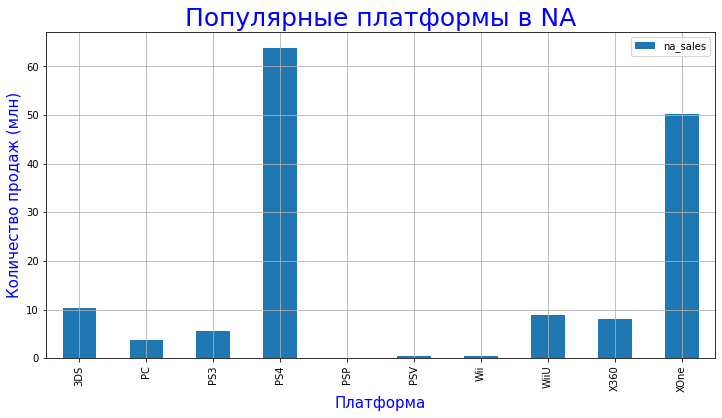

,na_sales
platform,
PS4,63.860000
XOne,50.300000
3DS,10.310000
WiiU,8.860000
X360,8.050000


In [35]:
na_platform = df.pivot_table(index='platform',
                            values='na_sales', 
                            aggfunc='sum').plot(y='na_sales',
                                                kind='bar',
                                                grid=True,
                                                figsize=(12, 6))


plt.title('Популярные платформы в NA', color='blue', fontsize=25)
plt.xlabel('Платформа', fontsize=15, color='blue')
plt.ylabel('Количество продаж (млн)', fontsize=15, color='blue')
plt.show()

na_platform = df.pivot_table(index='platform',
                            values='na_sales', 
                            aggfunc='sum').sort_values(by='na_sales')[::-1]

na_platform.head(5).style.background_gradient('coolwarm')

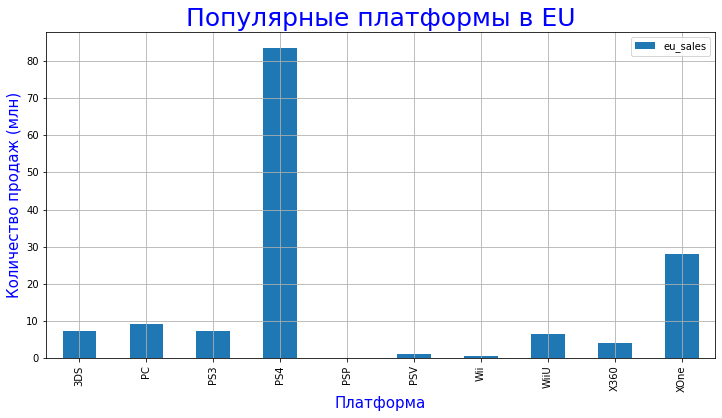

,eu_sales
platform,
PS4,83.540000
XOne,28.100000
PC,9.100000
3DS,7.390000
PS3,7.300000


In [36]:
eu_platform = df.pivot_table(index='platform',
                                    values='eu_sales', 
                                    aggfunc='sum').plot(y='eu_sales',
                                                        kind='bar',
                                                        grid=True,
                                                        figsize=(12, 6))



plt.title('Популярные платформы в EU', color='blue', fontsize=25)
plt.xlabel('Платформа', fontsize=15, color='blue')
plt.ylabel('Количество продаж (млн)', fontsize=15, color='blue')
plt.show()

eu_platform = df.pivot_table(index='platform',
                            values='eu_sales', 
                            aggfunc='sum').sort_values(by='eu_sales')[::-1]

eu_platform.head(5).style.background_gradient('coolwarm')

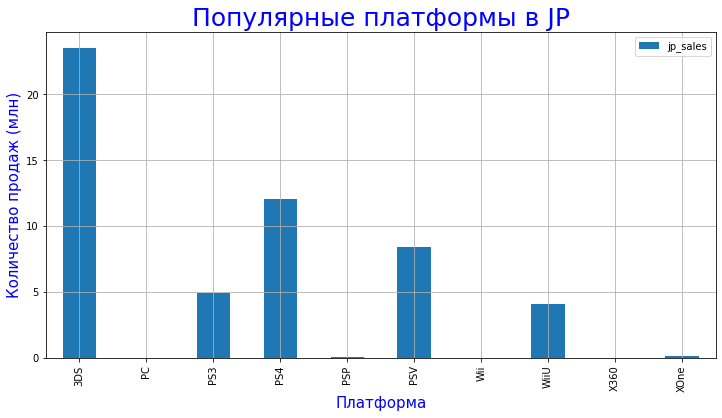

,jp_sales
platform,
3DS,23.550000
PS4,12.050000
PSV,8.410000
PS3,4.970000
WiiU,4.120000


In [37]:
jp_platform = df.pivot_table(index='platform',
                            values='jp_sales', 
                            aggfunc='sum').plot(y='jp_sales',
                                                kind='bar',
                                                grid=True,
                                                figsize=(12, 6))


plt.title('Популярные платформы в JP', color='blue', fontsize=25)
plt.xlabel('Платформа', fontsize=15, color='blue')
plt.ylabel('Количество продаж (млн)', fontsize=15, color='blue')
plt.show()

jp_platform = df.pivot_table(index='platform',
                            values='jp_sales', 
                            aggfunc='sum').sort_values(by='jp_sales')[::-1]

jp_platform.head(5).style.background_gradient('coolwarm')

В NA и EU схожая популярность платформ, преобладают стационарные, лидеромая явлестя PS4. Xone почти в два раза популярнее в NA, чем EU. В JP большой спрос имеют портативные консоли, однако PS4 остаётся на втором месте по популярности.

#### Самые популярные жанры (топ-5). Поясните разницу.

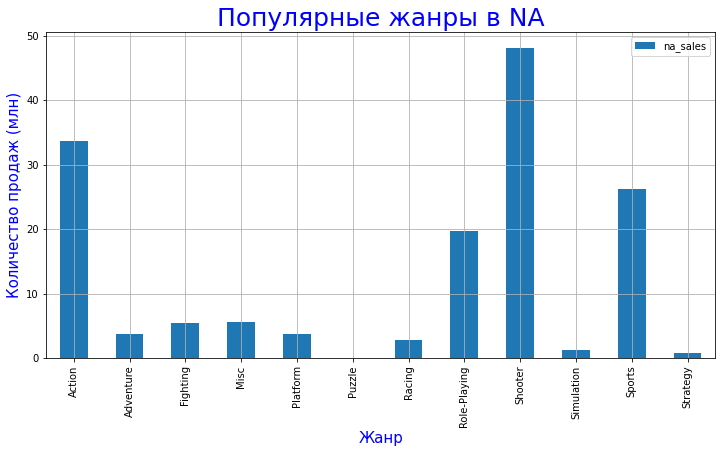

,na_sales
genre,
Shooter,48.180000
Action,33.680000
Sports,26.310000
Role-Playing,19.820000
Misc,5.580000


In [38]:
na_platform = df.pivot_table(index='genre',
                            values='na_sales', 
                            aggfunc='sum').plot(y='na_sales',
                                                kind='bar',
                                                grid=True,
                                                figsize=(12, 6))


plt.title('Популярные жанры в NA', color='blue', fontsize=25)
plt.xlabel('Жанр', fontsize=15, color='blue')
plt.ylabel('Количество продаж (млн)', fontsize=15, color='blue')
plt.show()

na_platform = df.pivot_table(index='genre',
                            values='na_sales', 
                            aggfunc='sum').sort_values(by='na_sales')[::-1]

na_platform.head(5).style.background_gradient('coolwarm')

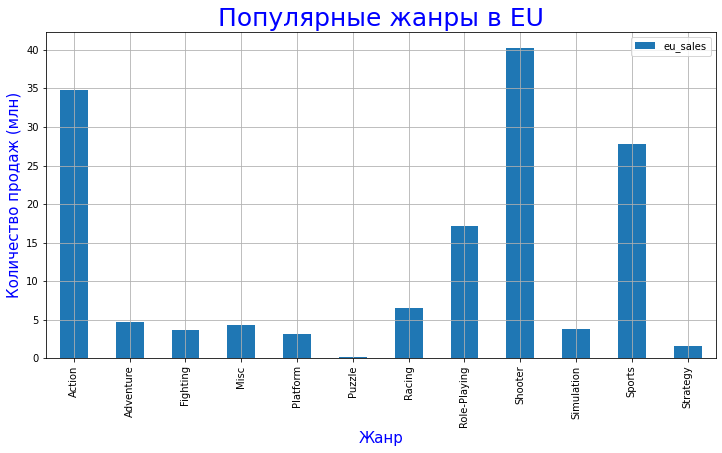

,eu_sales
genre,
Shooter,40.280000
Action,34.820000
Sports,27.820000
Role-Playing,17.210000
Racing,6.520000


In [39]:
eu_platform = df.pivot_table(index='genre',
                                    values='eu_sales', 
                                    aggfunc='sum').plot(y='eu_sales',
                                                        kind='bar',
                                                        grid=True,
                                                        figsize=(12, 6))



plt.title('Популярные жанры в EU', color='blue', fontsize=25)
plt.xlabel('Жанр', fontsize=15, color='blue')
plt.ylabel('Количество продаж (млн)', fontsize=15, color='blue')
plt.show()

eu_platform = df.pivot_table(index='genre',
                            values='eu_sales', 
                            aggfunc='sum').sort_values(by='eu_sales')[::-1]

eu_platform.head(5).style.background_gradient('coolwarm')

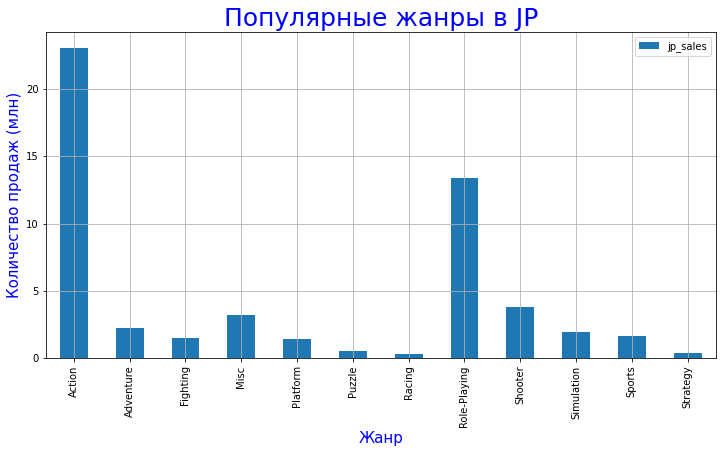

,jp_sales
genre,
Action,23.050000
Role-Playing,13.410000
Shooter,3.790000
Misc,3.190000
Adventure,2.220000


In [40]:
jp_platform = df.pivot_table(index='genre',
                            values='jp_sales', 
                            aggfunc='sum').plot(y='jp_sales',
                                                kind='bar',
                                                grid=True,
                                                figsize=(12, 6))


plt.title('Популярные жанры в JP', color='blue', fontsize=25)
plt.xlabel('Жанр', fontsize=15, color='blue')
plt.ylabel('Количество продаж (млн)', fontsize=15, color='blue')
plt.show()

jp_platform = df.pivot_table(index='genre',
                            values='jp_sales', 
                            aggfunc='sum').sort_values(by='jp_sales')[::-1]

jp_platform.head(5).style.background_gradient('coolwarm')

NA и EU имеют схожие жарны, преобладают 1. Shooter, 2. Action и 3. Sport. В JP сильно выдетяется Role-Playing, однако Action так же находится на втором месте по популярности.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Расмотрим влияние рейтинга ESRB на продажи:

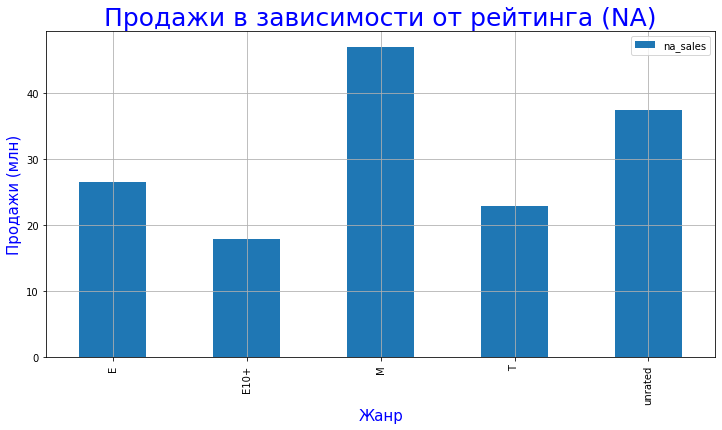

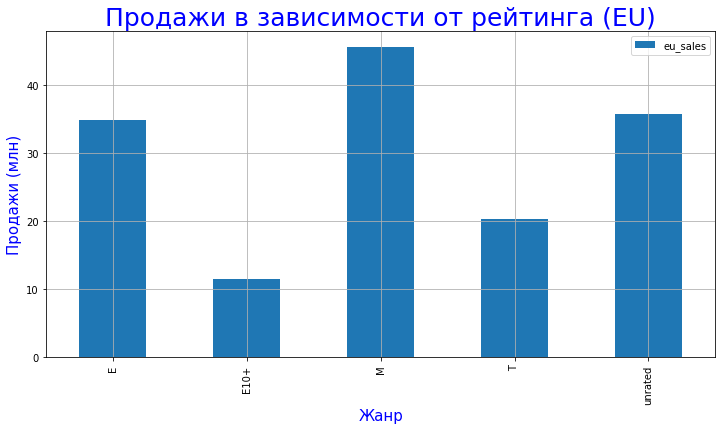

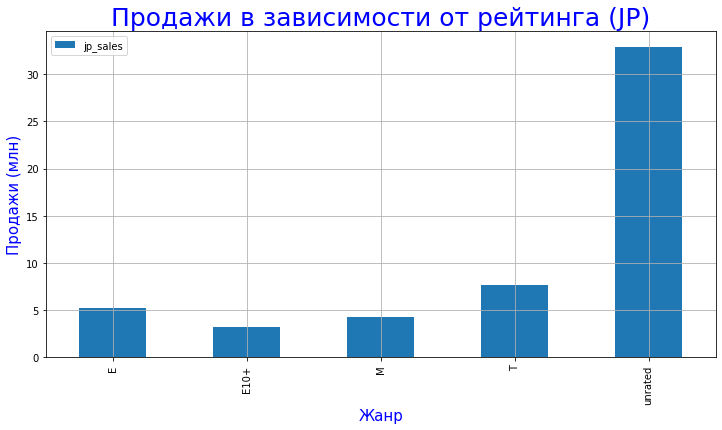

In [41]:
na_esrb = df.pivot_table(index='rating',
                            values='na_sales', 
                            aggfunc='sum').plot(y='na_sales',
                                                kind='bar',
                                                grid=True,
                                                figsize=(12, 6))


plt.title('Продажи в зависимости от рейтинга (NA)', color='blue', fontsize=25)
plt.xlabel('Жанр', fontsize=15, color='blue')
plt.ylabel('Продажи (млн)', fontsize=15, color='blue')
plt.show()

eu_esrb = df.pivot_table(index='rating',
                            values='eu_sales', 
                            aggfunc='sum').plot(y='eu_sales',
                                                kind='bar',
                                                grid=True,
                                                figsize=(12, 6))


plt.title('Продажи в зависимости от рейтинга (EU)', color='blue', fontsize=25)
plt.xlabel('Жанр', fontsize=15, color='blue')
plt.ylabel('Продажи (млн)', fontsize=15, color='blue')
plt.show()

jp_esrb = df.pivot_table(index='rating',
                            values='jp_sales', 
                            aggfunc='sum').plot(y='jp_sales',
                                                kind='bar',
                                                grid=True,
                                                figsize=(12, 6))


plt.title('Продажи в зависимости от рейтинга (JP)', color='blue', fontsize=25)
plt.xlabel('Жанр', fontsize=15, color='blue')
plt.ylabel('Продажи (млн)', fontsize=15, color='blue')
plt.show()

В NA и EU самый популярным рейтингом продаж явлется М, самым непопулярным - E10+. В JP самые популярные - игры без рейтинга, самые непопулярные E10+.

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

In [42]:
df_xone = df.query('platform == "XOne"')
df_xone = df_xone.query('0 < user_score < 999')

df_pc = df.query('platform == "PC"')
df_pc = df_pc.query('0 < user_score < 999')

print('Средний пользовательский рейтинг XboxOne:', df_xone['user_score'].median())
print('Средний пользовательский рейтинг PC:', df_pc['user_score'].median())


Средний пользовательский рейтинг XboxOne: 6.7
Средний пользовательский рейтинг PC: 6.9


Средний пользовательский рейтинг по платформам XboxOne - 6.7 и PC - 6.9. Предположим что это могло произойти случайно. Пусть нулевая гипотеза звучит так - средний рейтинг равен. Альтернативная - не равен.

In [43]:
alpha = 0.05

results = st.ttest_ind(df_xone['user_score'], df_pc['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


С вероятностью 29.4 % различие можно было получить случайно. Это значит, что средний пользовательский рейтинг платформ XboxOne и PC не отличается

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:

In [44]:
df_action = df.query('genre == "Action"')
df_action = df_action.query('0 < user_score < 999')

df_sports = df.query('genre == "Sports"')
df_sports = df_sports.query('0 < user_score < 999')

print('Средний пользовательский рейтинг Action:', df_action['user_score'].median())
print('Средний пользовательский рейтинг Sports:', df_sports['user_score'].median())

Средний пользовательский рейтинг Action: 7.1
Средний пользовательский рейтинг Sports: 5.55


Средний пользовательский рейтинг по жарнам Action - 7.1 и Sports - 5.55. Предположим что это могло произойти случайно. Пусть нулевая гипотеза звучит так - средний рейтинг равен. Альтернативная - не равен.

In [45]:
results = st.ttest_ind(df_action['user_score'], df_sports['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


С крайней маленькой вероятностью отличая можно получить случайно. Это значит, что средний пользовательский рейтинг жанров Action и Sports отличаются

## Общий вывод

Проанализиров ситуацию на рынке игр, можно сделать вывод о том, что лучшей платформой для потецниальной игры будет PS4, которая имеет имеет высокую популярность и отличные показатели продаж. 

In [46]:
top_platform_sales_2015_2016.head(5).style.background_gradient('coolwarm')

,all_sales
platform,
PS4,159.450000
XOne,78.580000
3DS,41.250000
WiiU,19.470000
PS3,17.930000


Лучим жарном будет Action с органичением М, либо без ограничения рейтинга.

In [47]:
all_platform_genre = df.pivot_table(index='genre',
                                    values='all_sales', 
                                    aggfunc='median').sort_values(by='all_sales')[::-1]

all_platform_genre.head(5).style.background_gradient('coolwarm')

,all_sales
genre,
Shooter,0.350000
Sports,0.110000
Role-Playing,0.100000
Simulation,0.090000
Platform,0.090000


Основная рекламная компания на данную платформу и жанр должны прийтись на регионы EU и NA.